# 라이브러리 임포트

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# 데이터 불러오기 및 전처리

In [2]:
# 이미지 데이터 로드
plastic_data = np.load('/content/drive/MyDrive/plastic_images.npy')
non_plastic_data = np.load('/content/drive/MyDrive/non_plastic_image.npy')

# 라벨 생성
plastic_label = np.ones((plastic_data.shape[0],))
non_plastic_label = np.zeros((non_plastic_data.shape[0],))

# 데이터 및 라벨 병합
X = np.concatenate((plastic_data, non_plastic_data), axis=0)
y = np.concatenate((plastic_label, non_plastic_label), axis=0)

# train/validation 분할
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# 데이터 증강
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(
    X_train, y_train, batch_size=32, shuffle=True)

val_generator = val_datagen.flow(
    X_val, y_val, batch_size=32, shuffle=False)



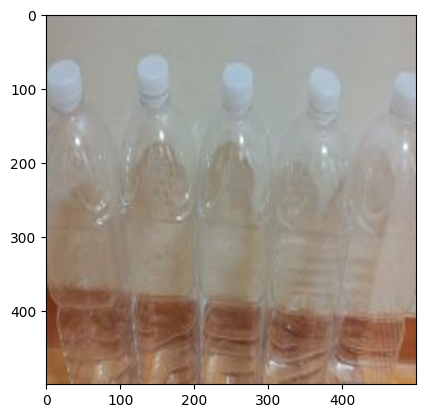

In [8]:
import matplotlib.pyplot as plt
plt.imshow(plastic_data[0])

In [3]:
# 모델 구성
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(500, 500, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [4]:
# 모델 훈련
model.fit(train_generator,
          steps_per_epoch=len(X_train) // 32,
          epochs=5,
          validation_data=val_generator,
          validation_steps=len(X_val) // 32)

Epoch 1/5
300/300 [==============================] - 520s 2s/step - loss: 0.6319 - accuracy: 0.6942 - val_loss: 0.4564 - val_accuracy: 0.8404
Epoch 2/5
300/300 [==============================] - 517s 2s/step - loss: 0.4404 - accuracy: 0.8052 - val_loss: 0.3558 - val_accuracy: 0.8196
Epoch 3/5
300/300 [==============================] - 520s 2s/step - loss: 0.2407 - accuracy: 0.9089 - val_loss: 0.1483 - val_accuracy: 0.9425
Epoch 4/5
300/300 [==============================] - 519s 2s/step - loss: 0.1905 - accuracy: 0.9313 - val_loss: 0.2168 - val_accuracy: 0.9054
Epoch 5/5
300/300 [==============================] - 517s 2s/step - loss: 0.1607 - accuracy: 0.9413 - val_loss: 0.1265 - val_accuracy: 0.9542


In [5]:
model.fit(train_generator,
          steps_per_epoch=len(X_train) // 32,
          epochs=2,
          validation_data=val_generator,
          validation_steps=len(X_val) // 32)

Epoch 1/2
300/300 [==============================] - 519s 2s/step - loss: 0.1212 - accuracy: 0.9567 - val_loss: 0.1188 - val_accuracy: 0.9525
Epoch 2/2
300/300 [==============================] - 506s 2s/step - loss: 0.1107 - accuracy: 0.9622 - val_loss: 0.0927 - val_accuracy: 0.9608


In [7]:
# 모델 저장
model.save('/content/plastic_classification_model.h5')